In [1]:
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
from elfi.examples.gauss import get_model

%matplotlib inline
%precision 2

import logging
logging.basicConfig(level=logging.INFO)

# Set an arbitrary global seed to keep the randomly generated quantities the same
seed = 1
np.random.seed(seed)

import elfi
N = 1000
fitting_steps = 25

### 1-D Gaussian model

In [2]:
true_mu_1d = [2]
cov_matrix_1d = [1]

In [3]:
m_1d = get_model(true_params=true_mu_1d, nd_mean=True, cov_matrix=cov_matrix_1d, seed_obs=seed)

In [4]:
m_1d.parameter_names

['mu_0']

In [5]:
rej_1d = elfi.Rejection(m_1d['d'], batch_size=N, seed=seed)

In [6]:
bounds_1d = {'mu_0': (-2.5, 2.5)}

In [7]:
gp_1d = elfi.GPyRegression(m_1d.parameter_names, bounds_1d)

In [8]:
prior_1d = elfi.methods.utils.ModelPrior(m_1d)

In [9]:
acq_1d = elfi.methods.bo.acquisition.RandMaxVar(model=gp_1d, prior=prior_1d)

In [10]:
initial_evidence = 10
update_interval = 1
n_rejection_samples = 2 * initial_evidence

In [11]:
rej_result_1d = rej_1d.sample(n_samples=n_rejection_samples, quantile = 1)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [12]:
bolfi_1d = elfi.BOLFI(m_1d, 'd', batch_size=1, initial_evidence=rej_result_1d.outputs, 
                   update_interval=update_interval, bounds=bounds_1d, seed=scipy.random.seed(), 
                   async=True, target_model=gp_1d, acquisition_method=acq_1d, acq_noise_var=[0.1], 
                   batches_per_acquisition=1)

In [13]:
bolfi_1d.fit(n_evidence=fitting_steps)

INFO:elfi.methods.parameter_inference:BOLFI: Fitting the surrogate model...
INFO:elfi.methods.mcmc:NUTS: Performing 50 iterations with 25 adaptation steps.


 /m/home/home2/27/musaevm1/unix/Documents/RA/elfi/elfi/methods/mcmc.py:207: RuntimeWarning:overflow encountered in exp
INFO:elfi.methods.mcmc:NUTS: Adaptation/warmup finished. Sampling...
INFO:elfi.methods.mcmc:NUTS: Acceptance ratio: 0.184. After warmup 13 proposals were outside of the region allowed by priors and rejected, decreasing acceptance ratio.
INFO:elfi.methods.mcmc:NUTS: Performing 50 iterations with 25 adaptation steps.


INFO:elfi.methods.mcmc:NUTS: Adaptation/warmup finished. Sampling...
INFO:elfi.methods.mcmc:NUTS: Acceptance ratio: 0.278. After warmup 11 proposals were outside of the region allowed by priors and rejected, decreasing acceptance ratio.
INFO:elfi.methods.mcmc:NUTS: Performing 50 iterations with 25 adaptation steps.


INFO:elfi.methods.mcmc:NUTS: Adaptation/warmup finished. Sampling...
INFO:elfi.methods.mcmc:NUTS: Acceptance ratio: 0.595. After warmup 2 proposals were outside of the region allowed by priors and rejected, decreasing acceptance ratio.
INFO:elfi.methods.mcmc:NUTS: Performing 50 iterations with 25 adaptation steps.


INFO:elfi.methods.mcmc:NUTS: Adaptation/warmup finished. Sampling...
INFO:elfi.methods.mcmc:NUTS: Acceptance ratio: 0.532. After warmup 2 proposals were outside of the region allowed by priors and rejected, decreasing acceptance ratio.
INFO:elfi.methods.mcmc:NUTS: Performing 50 iterations with 25 adaptation steps.


INFO:elfi.methods.mcmc:NUTS: Adaptation/warmup finished. Sampling...
INFO:elfi.methods.mcmc:NUTS: Acceptance ratio: 0.044. After warmup 17 proposals were outside of the region allowed by priors and rejected, decreasing acceptance ratio.


Progress: |██████████████████████████████████████████████████| 100.0% Complete


INFO:elfi.methods.posteriors:Using optimized minimum value (0.0323) of the GP discrepancy mean function as a threshold


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fead47aa5c0>],
      dtype=object)

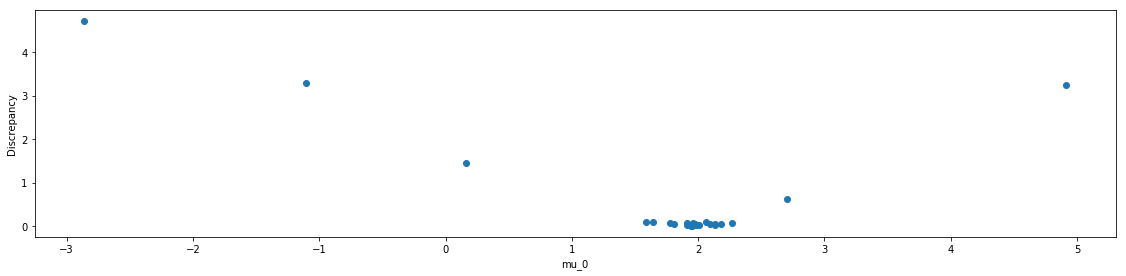

In [14]:
bolfi_1d.plot_discrepancy()

In [15]:
bolfi_1d.target_model


Name : GP regression
Objective : -4.467329386837193
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |      priors    
  sum.rbf.variance         |     1.6353259529778361  |      +ve      |  Ga(0.0011, 1) 
  sum.rbf.lengthscale      |     1.0118752173649201  |      +ve      |    Ga(1.7, 1)  
  sum.bias.variance        |     0.9786540319039696  |      +ve      |  Ga(0.00027, 1)
  Gaussian_noise.variance  |  0.0006230134654743799  |      +ve      |                

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fead456dd30>]],
      dtype=object)

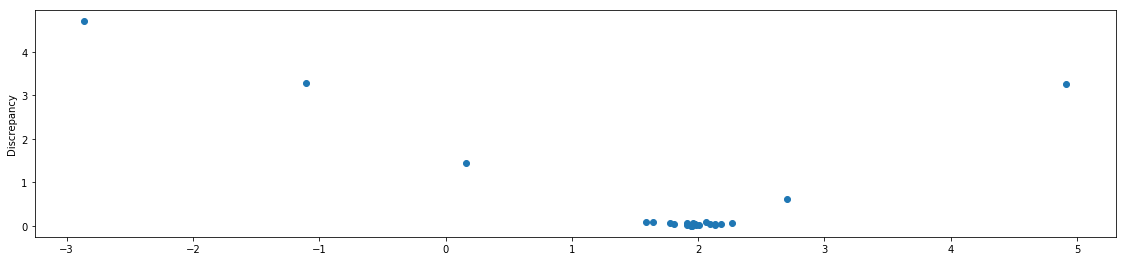

In [16]:
bolfi_1d.plot_gp()

### 2-D Gaussian model

In [17]:
true_mu_2d = [.2, .3]
cov_matrix_2d = [[.1, -.03], [-.03, .1]]

In [18]:
m_2d = get_model(true_params=true_mu_2d, nd_mean=True, cov_matrix=cov_matrix_2d, seed_obs=seed)

In [19]:
m_2d.parameter_names

['mu_0', 'mu_1']

In [20]:
bounds_2d = {'mu_0': (-.25, .25), 'mu_1': (-.5, .5)}

In [21]:
gp_2d = elfi.GPyRegression(m_2d.parameter_names, bounds_2d)

In [22]:
prior_2d = elfi.methods.utils.ModelPrior(m_2d)

In [23]:
acq_2d = elfi.methods.bo.acquisition.RandMaxVar(model=gp_2d, prior=prior_2d)

In [24]:
rej_2d = elfi.Rejection(m_2d['d'], batch_size = 1)

In [25]:
rej_result_2d = rej_2d.sample(n_samples=n_rejection_samples, quantile = 1)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [26]:
bolfi_2d = elfi.BOLFI(m_2d, 'd', batch_size=1, initial_evidence=rej_result_2d.outputs, 
                   update_interval=update_interval, bounds=bounds_2d, seed=scipy.random.seed(), 
                   async=True, target_model=gp_2d, acquisition_method=acq_2d, acq_noise_var=[0.1, 0.01], 
                   batches_per_acquisition=1)

In [27]:
bolfi_2d.fit(n_evidence=fitting_steps)

INFO:elfi.methods.parameter_inference:BOLFI: Fitting the surrogate model...
INFO:elfi.methods.mcmc:NUTS: Performing 50 iterations with 25 adaptation steps.


INFO:elfi.methods.mcmc:NUTS: Adaptation/warmup finished. Sampling...
INFO:elfi.methods.mcmc:NUTS: Acceptance ratio: 0.397. After warmup 5 proposals were outside of the region allowed by priors and rejected, decreasing acceptance ratio.
INFO:elfi.methods.mcmc:NUTS: Performing 50 iterations with 25 adaptation steps.


INFO:elfi.methods.mcmc:NUTS: Adaptation/warmup finished. Sampling...
INFO:elfi.methods.mcmc:NUTS: Acceptance ratio: 0.147
INFO:elfi.methods.mcmc:NUTS: Performing 50 iterations with 25 adaptation steps.
 /m/home/home2/27/musaevm1/unix/Documents/RA/elfi/elfi/methods/mcmc.py:207: RuntimeWarning:overflow encountered in exp


INFO:elfi.methods.mcmc:NUTS: Adaptation/warmup finished. Sampling...
INFO:elfi.methods.mcmc:NUTS: Acceptance ratio: 0.236
INFO:elfi.methods.mcmc:NUTS: Performing 50 iterations with 25 adaptation steps.


INFO:elfi.methods.mcmc:NUTS: Adaptation/warmup finished. Sampling...
INFO:elfi.methods.mcmc:NUTS: Acceptance ratio: 0.192
INFO:elfi.methods.mcmc:NUTS: Performing 50 iterations with 25 adaptation steps.


INFO:elfi.methods.mcmc:NUTS: Adaptation/warmup finished. Sampling...
INFO:elfi.methods.mcmc:NUTS: Acceptance ratio: 0.379


Progress: |██████████████████████████████████████████████████| 100.0% Complete


INFO:elfi.methods.posteriors:Using optimized minimum value (0.4189) of the GP discrepancy mean function as a threshold


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fead43a05c0>,
      dtype=object)

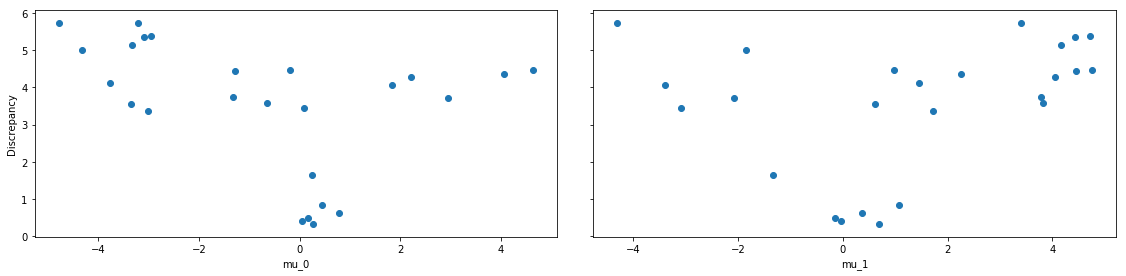

In [28]:
bolfi_2d.plot_discrepancy()

<Figure size 432x288 with 0 Axes>

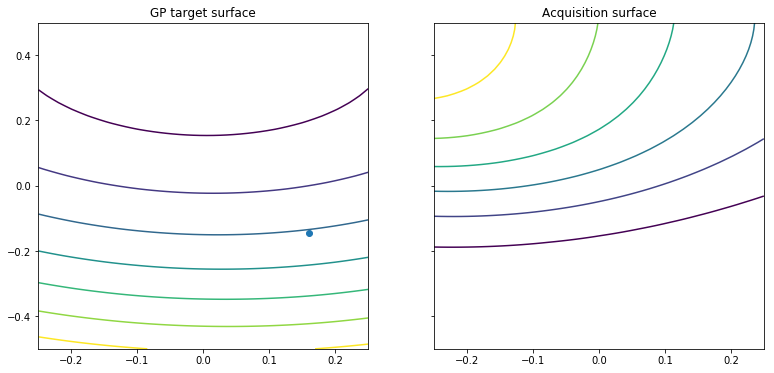

In [29]:
bolfi_2d.plot_state()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fead41752e8>,
      dtype=object)

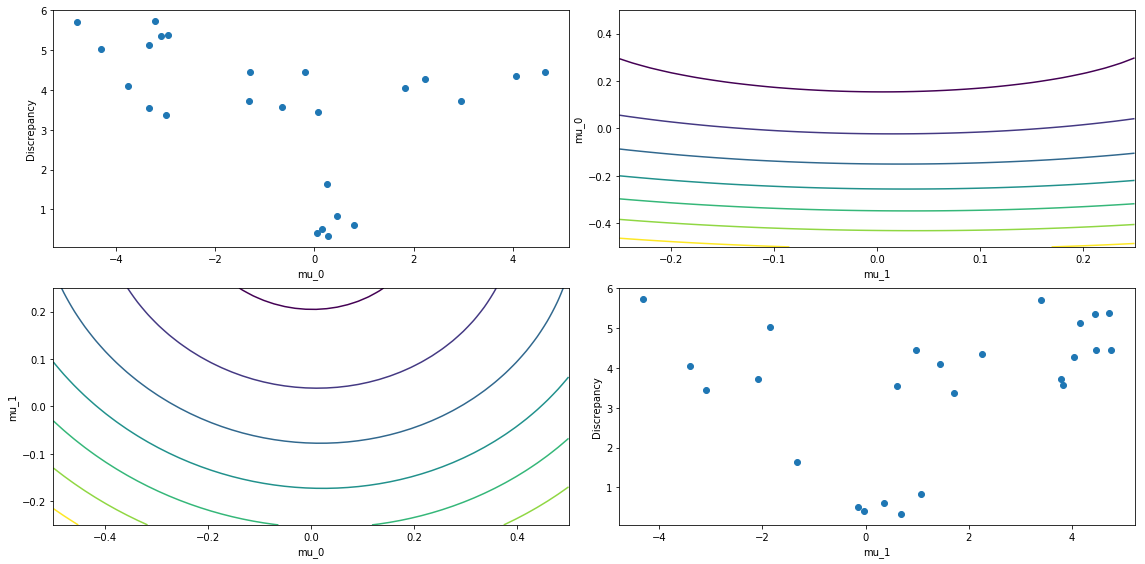

In [30]:
bolfi_2d.plot_gp()

### 3-D Gaussian model

In [31]:
true_mu_3d = [.2, .5, .6]
cov_matrix_3d = [[.1, -.03, 0], [-.03, .1, -.03], [.0, -.03, .1]]

In [32]:
m_3d = get_model(true_params=true_mu_3d, nd_mean=True, cov_matrix=cov_matrix_3d, seed_obs=seed)

In [33]:
m_3d.parameter_names

['mu_0', 'mu_1', 'mu_2']

In [34]:
rej_3d = elfi.Rejection(m_3d['d'], batch_size=N, seed=seed)

In [35]:
bounds_3d = {'mu_0': (-.25, .25), 'mu_1': (-.55, .55), 'mu_2': (-.65, .65)}

In [36]:
gp_3d = elfi.GPyRegression(m_3d.parameter_names, bounds_3d)

In [37]:
prior_3d = elfi.methods.utils.ModelPrior(m_3d)

In [38]:
acq_3d = elfi.methods.bo.acquisition.RandMaxVar(model=gp_3d, prior=prior_3d)

In [39]:
rej_result_3d = rej_3d.sample(n_samples=n_rejection_samples, quantile = 1)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [40]:
bolfi_3d = elfi.BOLFI(m_3d, 'd', batch_size=1, initial_evidence=rej_result_3d.outputs, 
                   update_interval=update_interval, bounds=bounds_3d, seed=scipy.random.seed(), 
                   async=True, target_model=gp_3d, acquisition_method=acq_3d, acq_noise_var=[0.1, 0.01, 0.1], 
                   batches_per_acquisition=1)

In [41]:
post = bolfi_3d.fit(n_evidence=fitting_steps)

INFO:elfi.methods.parameter_inference:BOLFI: Fitting the surrogate model...
INFO:elfi.methods.mcmc:NUTS: Performing 50 iterations with 25 adaptation steps.


INFO:elfi.methods.mcmc:NUTS: Adaptation/warmup finished. Sampling...
INFO:elfi.methods.mcmc:NUTS: Acceptance ratio: 0.171. After warmup 24 proposals were outside of the region allowed by priors and rejected, decreasing acceptance ratio.
INFO:elfi.methods.mcmc:NUTS: Performing 50 iterations with 25 adaptation steps.


INFO:elfi.methods.mcmc:NUTS: Adaptation/warmup finished. Sampling...
INFO:elfi.methods.mcmc:NUTS: Acceptance ratio: 0.083. After warmup 24 proposals were outside of the region allowed by priors and rejected, decreasing acceptance ratio.
INFO:elfi.methods.mcmc:NUTS: Performing 50 iterations with 25 adaptation steps.


INFO:elfi.methods.mcmc:NUTS: Adaptation/warmup finished. Sampling...
INFO:elfi.methods.mcmc:NUTS: Acceptance ratio: 0.160
INFO:elfi.methods.mcmc:NUTS: Performing 50 iterations with 25 adaptation steps.


INFO:elfi.methods.mcmc:NUTS: Adaptation/warmup finished. Sampling...
INFO:elfi.methods.mcmc:NUTS: Acceptance ratio: 0.094. After warmup 22 proposals were outside of the region allowed by priors and rejected, decreasing acceptance ratio.
INFO:elfi.methods.mcmc:NUTS: Performing 50 iterations with 25 adaptation steps.


INFO:elfi.methods.mcmc:NUTS: Adaptation/warmup finished. Sampling...
INFO:elfi.methods.mcmc:NUTS: Acceptance ratio: 0.162


Progress: |██████████████████████████████████████████████████| 100.0% Complete


INFO:elfi.methods.posteriors:Using optimized minimum value (0.4631) of the GP discrepancy mean function as a threshold


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fead21f7940>,
      dtype=object)

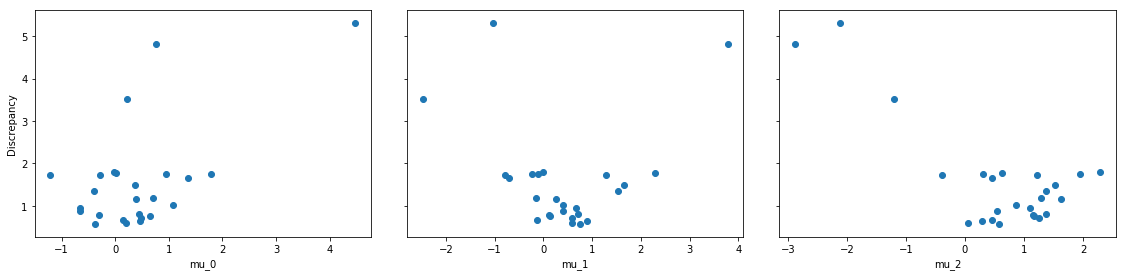

In [42]:
bolfi_3d.plot_discrepancy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fead213dcf8>,
      dtype=object)

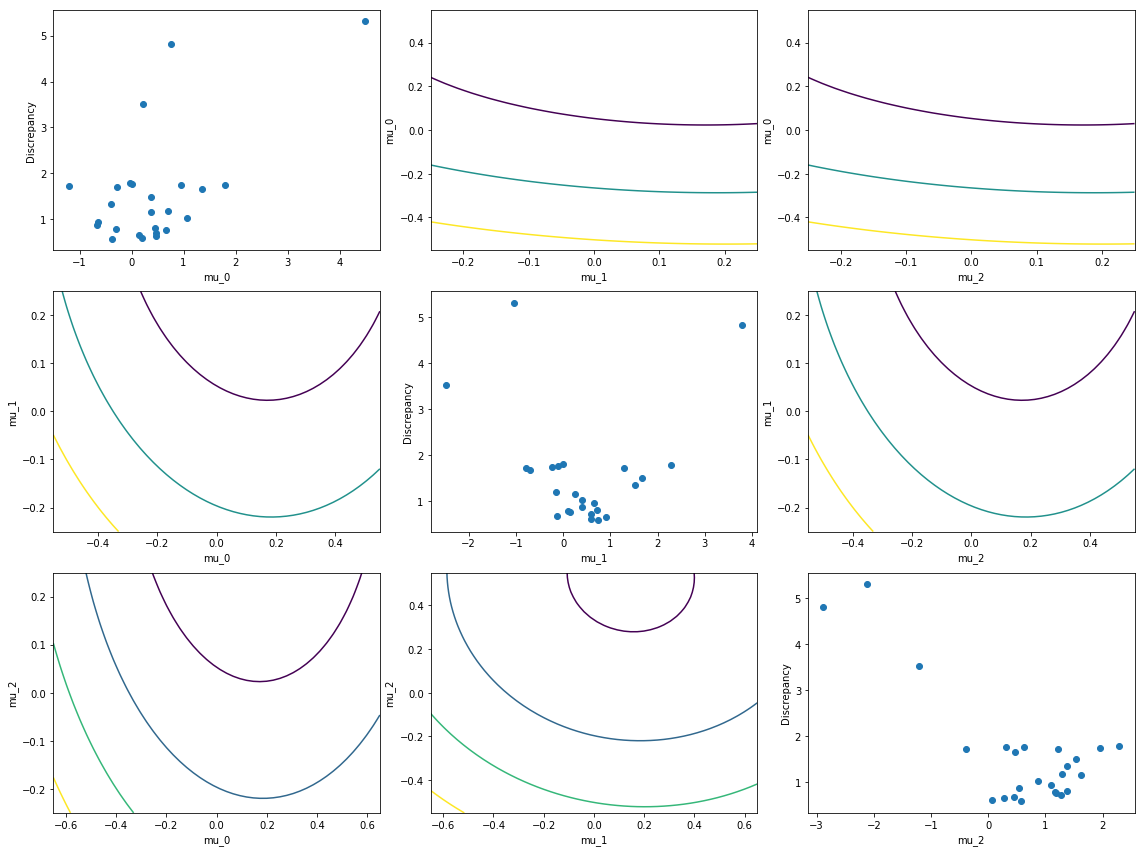

In [43]:
bolfi_3d.plot_gp()

# 4-D Gaussian model

In [44]:
true_mu_4d = [.2, .5, .6, .3]
cov_matrix_4d = [[.1, -.03,.03,.03], [-.03,.1,-.03,.03],[.03,-.03,.1,-.03],[.03,.03,-.03,.1]]

In [45]:
m_4d = get_model(true_params=true_mu_4d, nd_mean=True, cov_matrix=cov_matrix_4d, seed_obs=seed)

In [46]:
m_4d.parameter_names

['mu_0', 'mu_1', 'mu_2', 'mu_3']

In [47]:
rej_4d = elfi.Rejection(m_4d['d'], batch_size=N, seed=seed)

In [48]:
bounds_4d = {'mu_0': (-.25, .25), 'mu_1': (-.55, .55), 'mu_2': (-.65, .65), 'mu_3': (-.35, 35)}

In [49]:
gp_4d = elfi.GPyRegression(m_4d.parameter_names, bounds_4d)

In [50]:
prior_4d = elfi.methods.utils.ModelPrior(m_4d)

In [51]:
acq_4d = elfi.methods.bo.acquisition.RandMaxVar(model=gp_4d, prior=prior_4d)

In [52]:
rej_result_4d = rej_4d.sample(n_samples=n_rejection_samples, quantile = 1)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [53]:
bolfi_4d = elfi.BOLFI(m_4d, 'd', batch_size=1, initial_evidence=rej_result_4d.outputs, 
                   update_interval=update_interval, bounds=bounds_4d, seed=scipy.random.seed(), 
                   async=True, target_model=gp_4d, acquisition_method=acq_4d, acq_noise_var=[.1, .01, .1, .3], 
                   batches_per_acquisition=1)

In [54]:
post = bolfi_4d.fit(n_evidence=fitting_steps)

INFO:elfi.methods.parameter_inference:BOLFI: Fitting the surrogate model...
INFO:elfi.methods.mcmc:NUTS: Performing 50 iterations with 25 adaptation steps.


INFO:elfi.methods.mcmc:NUTS: Adaptation/warmup finished. Sampling...
INFO:elfi.methods.mcmc:NUTS: Acceptance ratio: 0.099. After warmup 24 proposals were outside of the region allowed by priors and rejected, decreasing acceptance ratio.
INFO:elfi.methods.mcmc:NUTS: Performing 50 iterations with 25 adaptation steps.


INFO:elfi.methods.mcmc:NUTS: Adaptation/warmup finished. Sampling...
INFO:elfi.methods.mcmc:NUTS: Acceptance ratio: 0.066. After warmup 24 proposals were outside of the region allowed by priors and rejected, decreasing acceptance ratio.
INFO:elfi.methods.mcmc:NUTS: Performing 50 iterations with 25 adaptation steps.


INFO:elfi.methods.mcmc:NUTS: Adaptation/warmup finished. Sampling...
INFO:elfi.methods.mcmc:NUTS: Acceptance ratio: 0.137. After warmup 1 proposals were outside of the region allowed by priors and rejected, decreasing acceptance ratio.


UnboundLocalError: local variable 'batch_theta' referenced before assignment

In [ ]:
bolfi_4d.plot_discrepancy()

In [ ]:
bolfi_4d.plot_gp()